# Electromiografía: Visualización de músculos del antebrazo a distintas fuerzas.

## Flores Oliva Alejandro Elliot
###### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

##### Registros elaborados por: Angélica Rubio García<sup>1</sup>, & Erin C. McKiernan<sup>2</sup>

<sup>1</sup> Licenciatura en Física Biomédica, Facultad de Ciencias, Universidad Nacional Autónoma de México<br/>
<sup>2</sup> Departamento de Física, Facultad de Ciencias, Universidad Nacional Autónoma de México<br/>

## Índice:
[1. Resumen](#Resumen)

[2. Configuración/Diseño del notebook. ](#Configuración/Diseñodelnotebook)

[3. Extraer y graficar los datos. ](#Extraerygraficarlosdatos)

[4. Visualización de registros.](#Visualizaciónderegistros)

[4.1 Pulsos cambiando de fuerza cada 20 segundos  de mano derecha.](#20manoderecha)\
[4.2 Pulsos cambiando de fuerza cada 20 segundos de mano izquierda.](#20manoizquierda)\
[4.3 Fatiga a 50 N por 100 segundos de mano derecha.](#100manoderecha)\
[4.4 Fatiga a 50 N por 100 segundos de mano izquierda.](#100manoizquierda)

<a id='Resumen'></a>
## Resumen

En este repositorio se extraerán y graficarán los registros de la actividad eléctrica de los músculos anteriores del antebrazo mediante registros a distintas fuerzas. Todas las grabaciones de electromiografía se obtuvieron utilizando Muscle SpikerBox y Hand Dynamometer para tomar los datos, para el análisis de estos, se usó Spike Recorder y Logger Pro 3.10.1. Cada registro se guardó como archivo de audio en formato .wav, .csv, .txt, .cmbl, utilizando el notebook de visualización podremos abrir esta señal (los registros utilizados en este notebook son del repositorio de la Dra. Erin Christy McKiernan: https://github.com/emckiernan/electrophys). Los resultados se obtuvieron de comparar los mismos ejercicios pero en manos diferentes, los electromiogramas realizados con la mano derecha fueron más grandes en amplitud, por otro lado las señales de la mano izquierda fueron menos amplificadas, podemos sustentar esta diferencia por medio de que la mano derecha es la dominante en este sujeto de pruebas. 

<a id='Configuración/Diseñodelnotebook'></a>
## Configuración/Diseño del notebook

Importamos los módulos de Python para trazar figuras, gráficos en el cuaderno y crear figuras con buena resolución y etiquetas grandes.

#### Librerías utilizadas 

Importamos las librerías/ módulos que nos permitirán hacer cálculos, filtrar datos, utilizar filtros, análisis, etc. 

In [208]:
#Importamos las librerías necesarias para este notebook.
import numpy as np                   #Es una biblioteca para crear vectores y matrices grandes multidimensionales.
import matplotlib.pyplot as plt      #Nos provee de un framework de gráficos parecido a MATLAB.
import scipy as sc                   #Es una líbreria con herramientas y algoritmos matemáticos.
from scipy import signal             #Permite el procesamiento de señales, funciones de filtrado, diseño de filtros y algoritmos de interpolación en dimensiones. 
import wave                          #El módulo de “wave”proporciona una interfaz conveniente para el formato de sonido WAV.
import pandas as pd    #Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.
import csv             #El módulo csv permite leer y escribir datos tabulares en formato CSV. 
import math            #Permite usar funciones matemáticas definidas en el estándar de C.
from scipy.signal import butter, lfilter, filtfilt #Herramientas de procesamiento de señales, funciones de filtrado, algoritmos de interpolación.

#### Comandos para configuración de las imágenes/gráficos 

Configuramos para ver las figuras en notebook, creación de etiquetas, módulos para la creación de trazos.

In [209]:
#Comando para ver figuras en el cuaderno Jupyter
%matplotlib inline 

#Módulo de trazado de importación
import matplotlib.pyplot as plt 

#Comandos para crear figuras de alta resolución con etiquetas grandes
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18                              #Tamaño de fuente para etiquetas de figuras
plt.rcParams['axes.titlesize'] = 20                              #Tamaño de fuente para títulos de figuras
plt.rcParams['font.size'] = 16                                   #Tamaño de fuente para números de figura
plt.rcParams['lines.linewidth'] = 1.6                            #Ancho de línea para trazar

<a id='Extraerygraficarlosdatos'></a>
## Extraer y graficar los datos

Las grabaciones de EMG se obtuvieron utilizando Muscle SpikerBox y Hand Dynamometer para tomar los datos,también se usó la interfaz Logger Pro 3.10.1 y se guardan como archivos de audio en formato .wav, .csv,.txt,cmbl. Utilizando las librerías para visualizar nuestros datos, posteriormente con el uso de otros comandos almacenaremos los resultados relevantes para los cálculos/ análisis posteriores.

### Abrimos la señal en formato .wav

In [309]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    #print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    #print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    #print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                           #Tamaño de la gráfica.
    plt.title('Fatiga a 50 N por 100 segundos con Spike Recorder de mano izquierda.') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

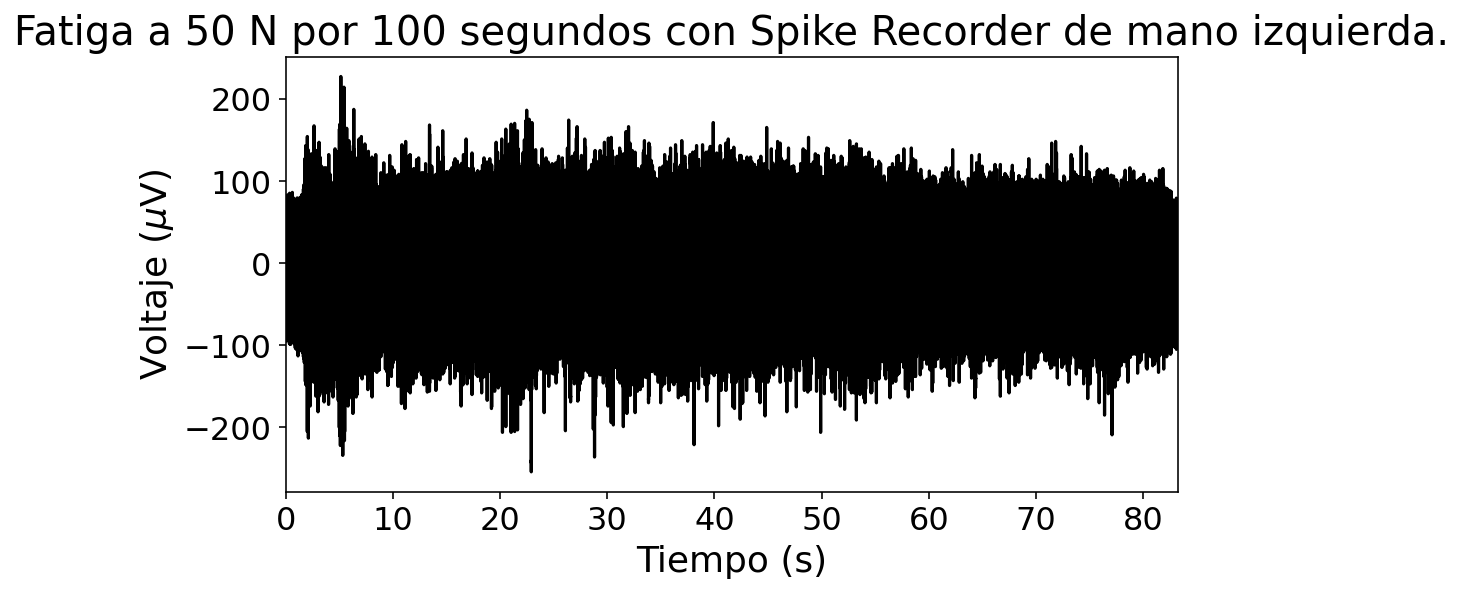

In [310]:
EMG(archivo='../Registros/leftHand/S1_EMG_leftHand_gripFatigue.wav')

### Abrimos la señal generada por el Hand Dynamometer Vernier y la interfaz LabQuest Mini Vernier.

#### Abrimos la señal en formatp .txt
Abrimos la señal generada por el Hand Dynamometer Vernier, el formato del archivo está en texto sencillo (.txt), utilizamos el método “read[bytes]”, sirve para leer  todo el contenido de un archivo.

In [297]:
Archivo = open("../Registros/leftHand/S1_force_leftHand_gripFatigue.txt", "r")
Vernier = Archivo.read()
print(Vernier)

ï»¿Vernier Format 2
fatiga.cmbl 05/05/20 14:46 .
Ãšltimo
Tiempo	Fuerza
t	F
s	N

0	8.60097312764
0.1	16.7820817865
0.2	31.2034759629
0.3	41.1097607475
0.4	43.8996940134
0.5	40.6784667161
0.6	34.6403502759
0.7	33.5755931358
0.8	34.6403502759
0.9	35.2872913231
1	35.0716443073
1.1	35.5029383388
1.2	36.149879386
1.3	36.3655264017
1.4	35.0716443073
1.5	35.5029383388
1.6	35.9342323702
1.7	35.7185853545
1.8	36.149879386
1.9	36.149879386
2	35.9342323702
2.1	34.8559972916
2.2	33.5755931358
2.3	32.2817110415
2.4	31.6347699943
2.5	30.9878289471
2.6	29.9095938685
2.7	29.9095938685
2.8	30.3408879
2.9	30.7721819314
3	31.6347699943
3.1	29.9095938685
3.2	25.3944844769
3.3	23.6693083511
3.4	25.8257785083
3.5	25.8257785083
3.6	24.7475434297
3.7	24.7475434297
3.8	43.0371059505
3.9	49.4930384837
4	43.6840469977
4.1	40.4628197004
4.2	37.0124674488
4.3	35.0716443073
4.4	31.2034759629
4.5	28.4000647585
4.6	27.3218296799
4.7	27.1061826642
4.8	25.6101314926
4.9	24.3162493983
5	23.8849553668
5.1	23.8849553668
5.

Utilizando la librería de pandas (definida como pd) , utilizamos una función que nos permite leer datos del archivo ('filename.csv' ), esta función es pd.read_csv.


In [298]:
pd.read_csv("../Registros/leftHand/S1_force_leftHand_gripFatigue.csv")

,Último: Tiempo (s),Último: Fuerza (N)
0,0.0,8.600973
1,0.1,16.782082
2,0.2,31.203476
3,0.3,41.109761
4,0.4,43.899694
...,...,...
796,79.6,13.116083
797,79.7,12.900436
798,79.8,13.116083
799,79.9,13.331730


#### Cambiamos el formato de .cmbl a .csv.

Los registros obtenidos de Hand Dynamometer & Logger Pro 3.10.1 se guardan como archivos con la extensión  .cmbl, estos archivos .cmbl también se denominan archivos de datos de Pro Logger pero generalmente se clasifican como archivos de datos. Para términos prácticos decidimos extraer los datos almacenados en el archivo .cmbl y transformarlos en formato .csv.

Utilizando la función que nos permite leer datos del archivo (.csv) mediante  pd.read_csv.Trazamos una gráfica de los resultados dados mediante la interfaz.

Text(0, 0.5, 'Fuerza (N)')

<Figure size 576x288 with 0 Axes>

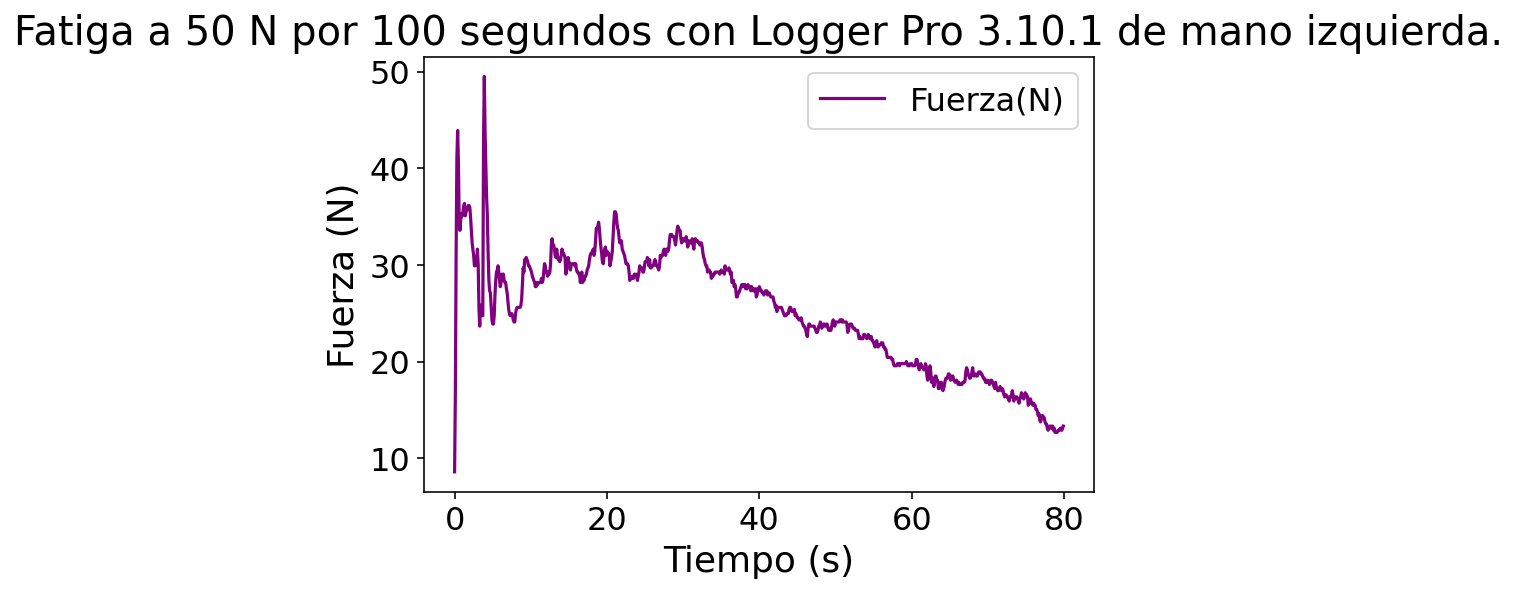

In [397]:
plt.figure(figsize=(8,4))                                                             #Tamaño de la gráfica
Vernier = pd.read_csv("../Registros/leftHand/S1_force_leftHand_gripFatigueEd.csv")    #Introducimos nuestro archivo .csv
Vernier.plot("Tiempo(s)", "Fuerza(N)", color='purple')              #Graficamos nuestros datos
#Graficamos EMG.
plt.title('Fatiga a 50 N por 100 segundos con Logger Pro 3.10.1 de mano izquierda.')  #Título.
plt.xlabel(r'Tiempo (s)')                                                             #Título del eje horizontal.
plt.ylabel(r'Fuerza (N)')                                                             #Título del eje vertical.

In [398]:
def EMG1(Vernier):
    plt.figure(figsize=(8,4))                                                             #Tamaño de la gráfica
    Vernier = pd.read_csv("../Registros/leftHand/S1_force_leftHand_gripFatigueEd.csv")    #Introducimos nuestro archivo .csv
    Vernier.plot("Tiempo(s)", "Fuerza(N)", color='purple')              #Graficamos nuestros datos
    #Graficamos EMG.
    plt.title('Fatiga a 50 N por 100 segundos con Logger Pro 3.10.1 de mano izquierda.')  #Título.
    plt.xlabel(r'Tiempo (s)')                                                             #Título del eje horizontal.
    plt.ylabel(r'Fuerza (N)')                                                             #Título del eje vertical.

Graficamos en una ventana ambas señales y  podemos limitar el tiempo registrado, en algunos registros de Hand Dynamometer Vernier/interfaz LabQuest Mini Vernier o por el  equipo Muscle SpikerBox se superó el tiempo deseado, por esta razón podemos “cortar” la gráfica para relacionar el mismo periodo de tiempo la actividad realizada. 

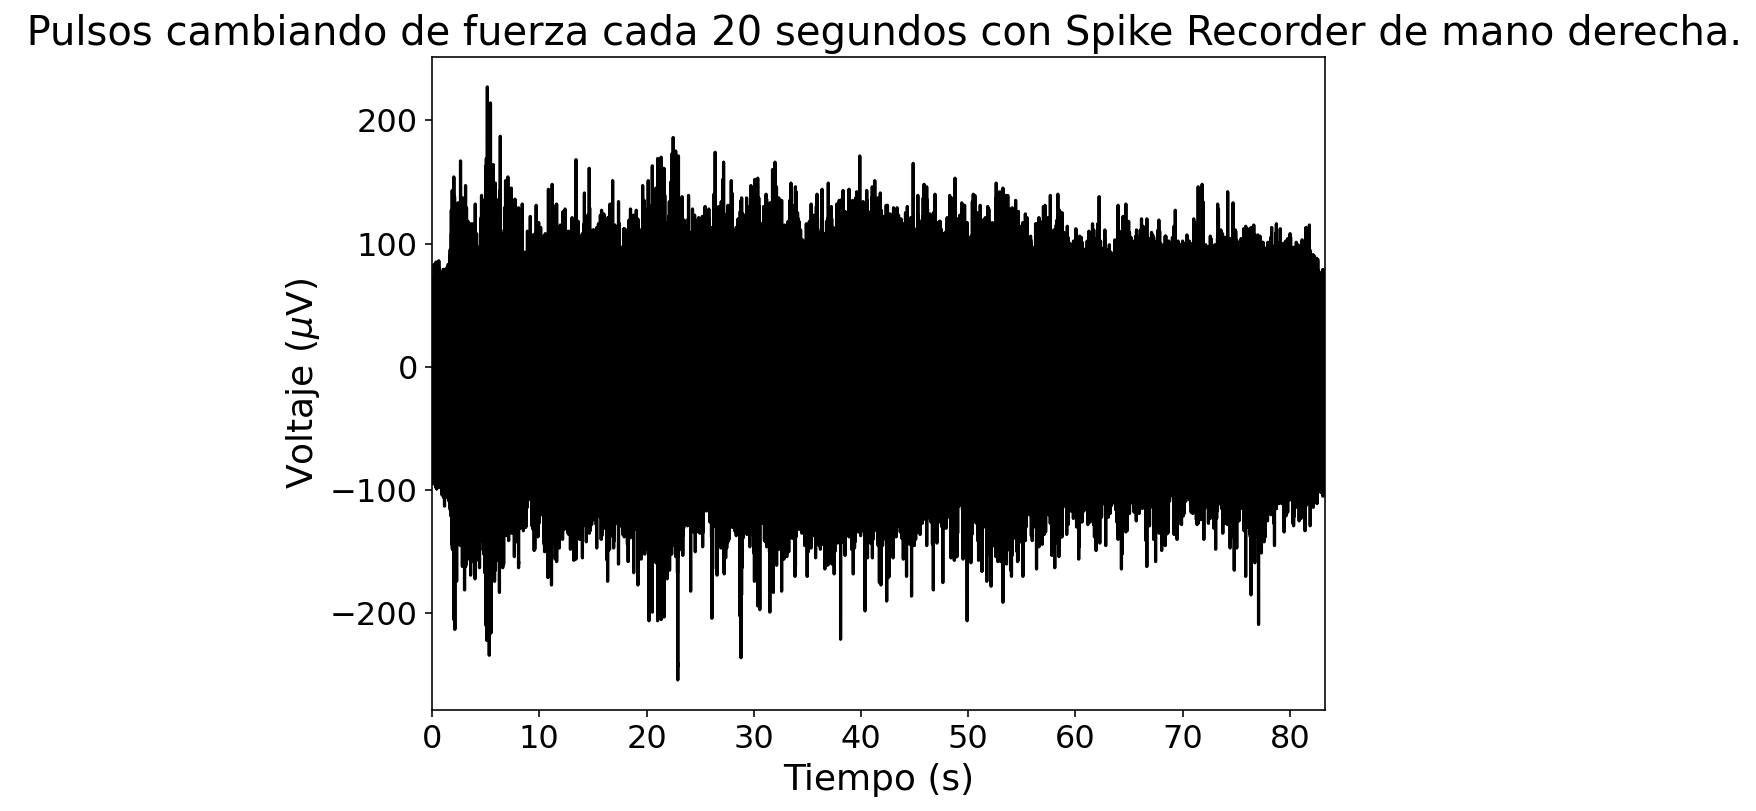

<Figure size 576x288 with 0 Axes>

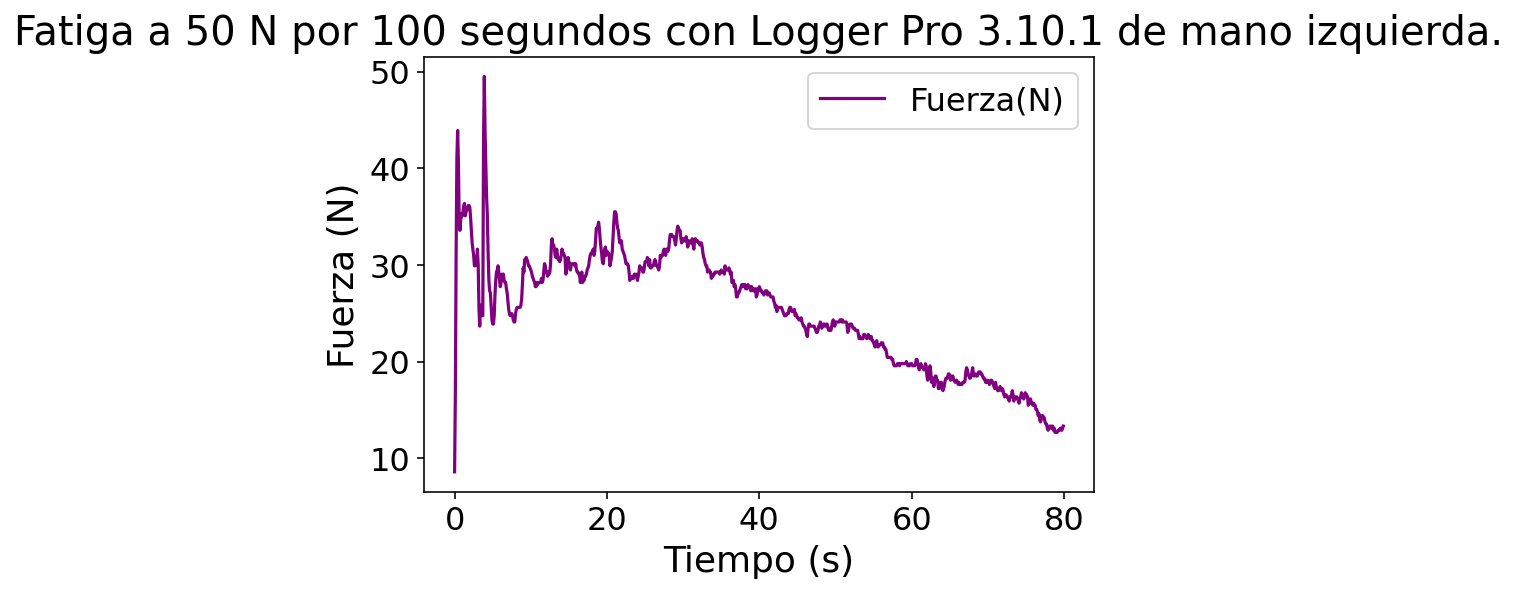

In [399]:
EMG(archivo='../Registros/leftHand/S1_EMG_leftHand_gripFatigue.wav')
EMG1(Vernier='../Registros/leftHand/S1_force_leftHand_gripFatigueEd.csv')

Una vez que logramos abrir nuestros registros, podemos visualizar el contenido de cada uno de nuestros archivos mediante el código.


<a id='Visualizaciónderegistros'></a>
## Visualización de registros

<a id='20manoderecha'></a>
### Pulsos cambiando de fuerza cada 20 segundos  de mano derecha.

In [401]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    #print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    #print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    #print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,6))                                           #Tamaño de la gráfica.
    #plt.xlim(0, 60)
    #plt.ylim(0, 10000)
    plt.title('Pulsos cambiando de fuerza cada 20 segundos con Spike Recorder de mano derecha.') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

In [418]:
def EMG2(Vernier):
    plt.figure(figsize=(8,6))                                                             #Tamaño de la gráfica
    Vernier = pd.read_csv("../Registros/rightHand/S1_force_rightHand_gripIntermittentEd.csv")    #Introducimos nuestro archivo .csv
    Vernier.plot("Tiempo(s)", "Fuerza(N)", color='purple')              #Graficamos nuestros datos
    #Graficamos EMG.
    plt.title('Pulsos cambiando de fuerza cada 20 segundos con Logger Pro 3.10.1 de mano derecha.')  #Título.
    plt.xlabel(r'Tiempo (s)')                                                             #Título del eje horizontal.
    plt.ylabel(r'Fuerza (N)')                                                             #Título del eje vertical.

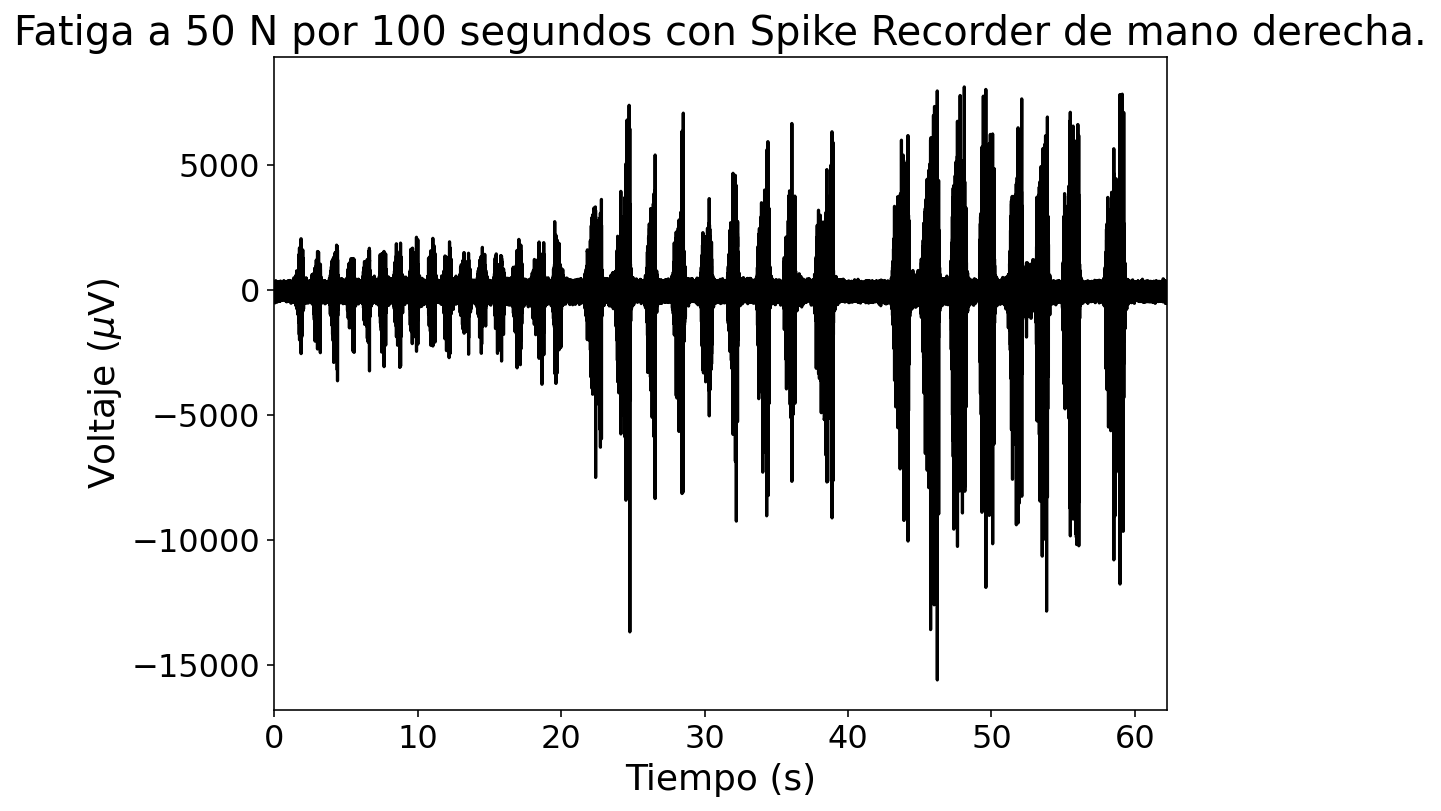

<Figure size 576x432 with 0 Axes>

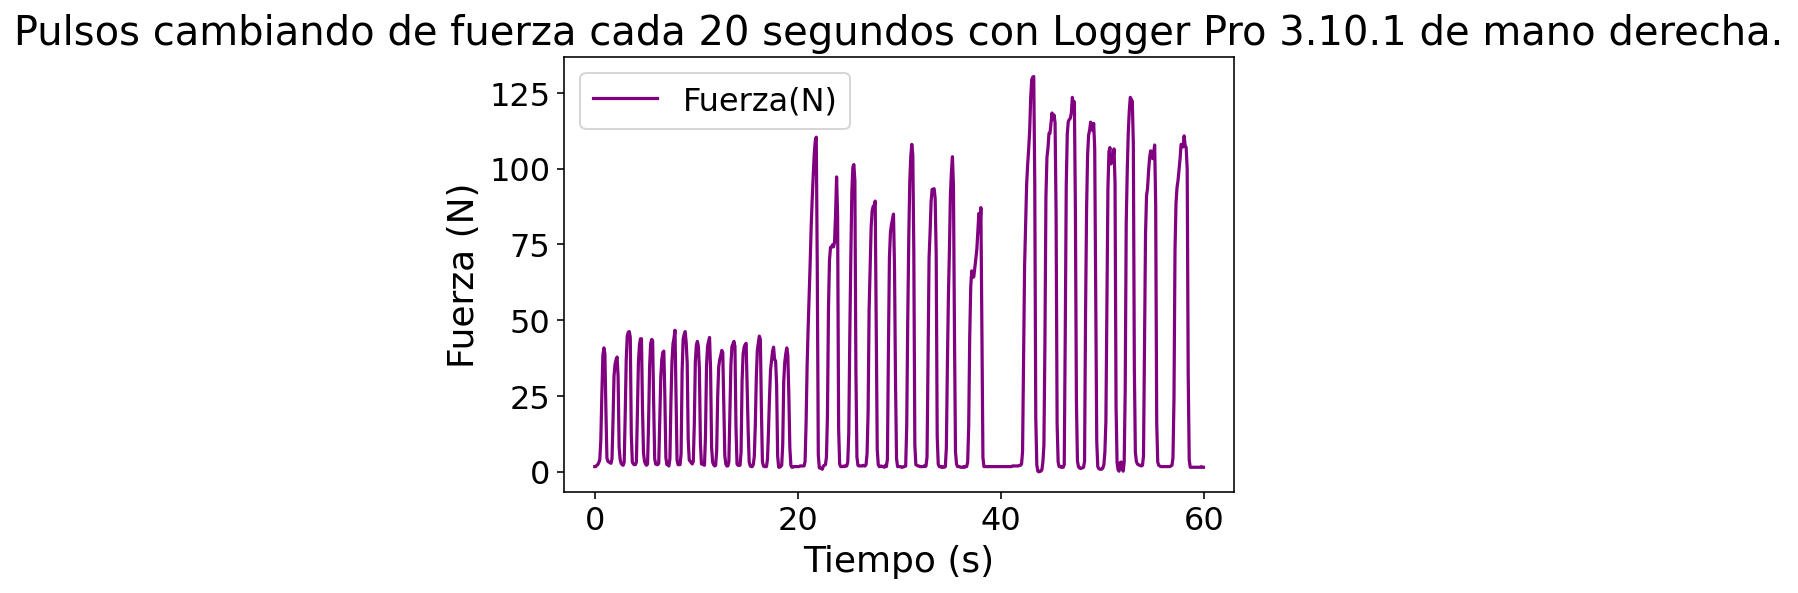

In [419]:
EMG(archivo='../Registros/rightHand/S1_EMG_rightHand_gripIntermittent.wav')
EMG2(Vernier="../Registros/rightHand/S1_force_rightHand_gripIntermittentEd.csv")

En las gráficas obtenidas de Hand Dynamometer Vernier/ Interfaz LabQuest Mini Vernier & Muscle SpikerBox en la mano derecha, se observan pulsos cambiando de fuerza cada 20 segundos a fuerzas de 50 N, 100 N y 200 N. Ambas señales son bastante parecidas, sin embargo , la señal registrada por la interfaz solamente almacena los datos rectificados/ absolutos (los datos positivos). Debemos destacar que la amplitud de los pulsos de la mano derecha es mayor a la de los pulsos registrados de la misma actividad pero en la mano izquierda, podemos suponer que la mano dominante del sujeto es la derecha.

<a id='20manoizquierda'></a>
### Pulsos cambiando de fuerza cada 20 segundos de mano izquierda.

In [404]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    #print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    #print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    #print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,6))                                           #Tamaño de la gráfica.
    #plt.xlim(0, 60)
    #plt.ylim(0, 10000)
    plt.title('Pulsos cambiando de fuerza cada 20 segundos con Spike Recorder de mano izquierda.') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

In [407]:
def EMG3(Vernier):
    plt.figure(figsize=(8,6))                                                             #Tamaño de la gráfica
    Vernier = pd.read_csv("../Registros/leftHand/S1_force_leftHand_gripIntermittentEd.csv")    #Introducimos nuestro archivo .csv
    Vernier.plot("Tiempo(s)", "Fuerza(N)", color='purple')                                 #Graficamos nuestros datos
    #Graficamos EMG.
    plt.title('Pulsos cambiando de fuerza cada 20 segundos con Logger Pro 3.10.1 de mano izquierda.')  #Título.
    plt.xlabel(r'Tiempo (s)')                                                             #Título del eje horizontal.
    plt.ylabel(r'Fuerza (N)')                                                             #Título del eje vertical.

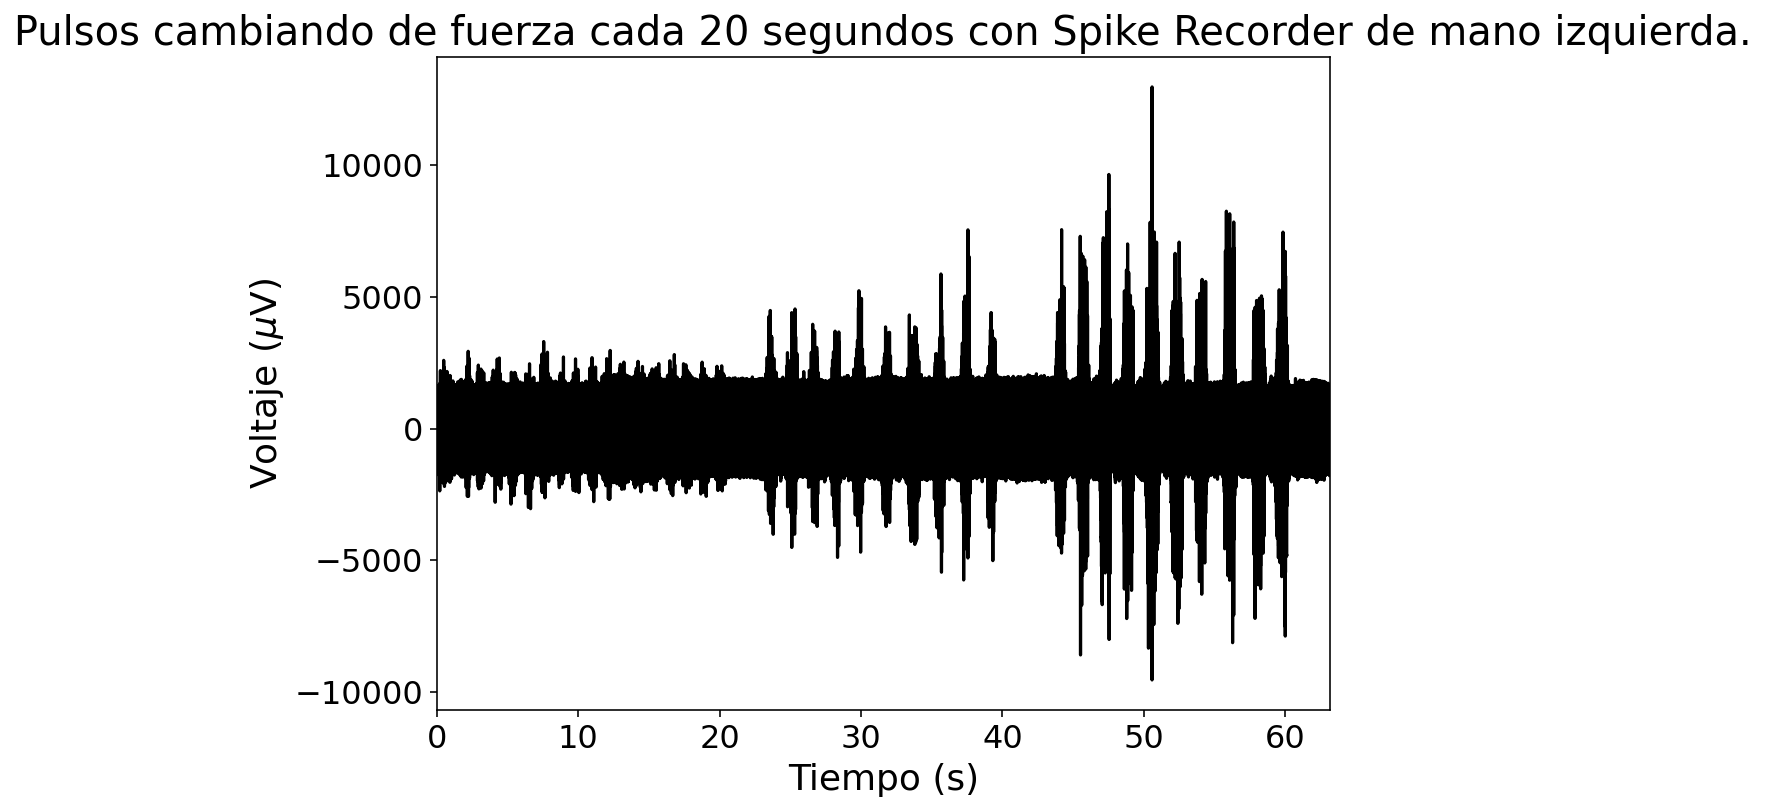

<Figure size 576x432 with 0 Axes>

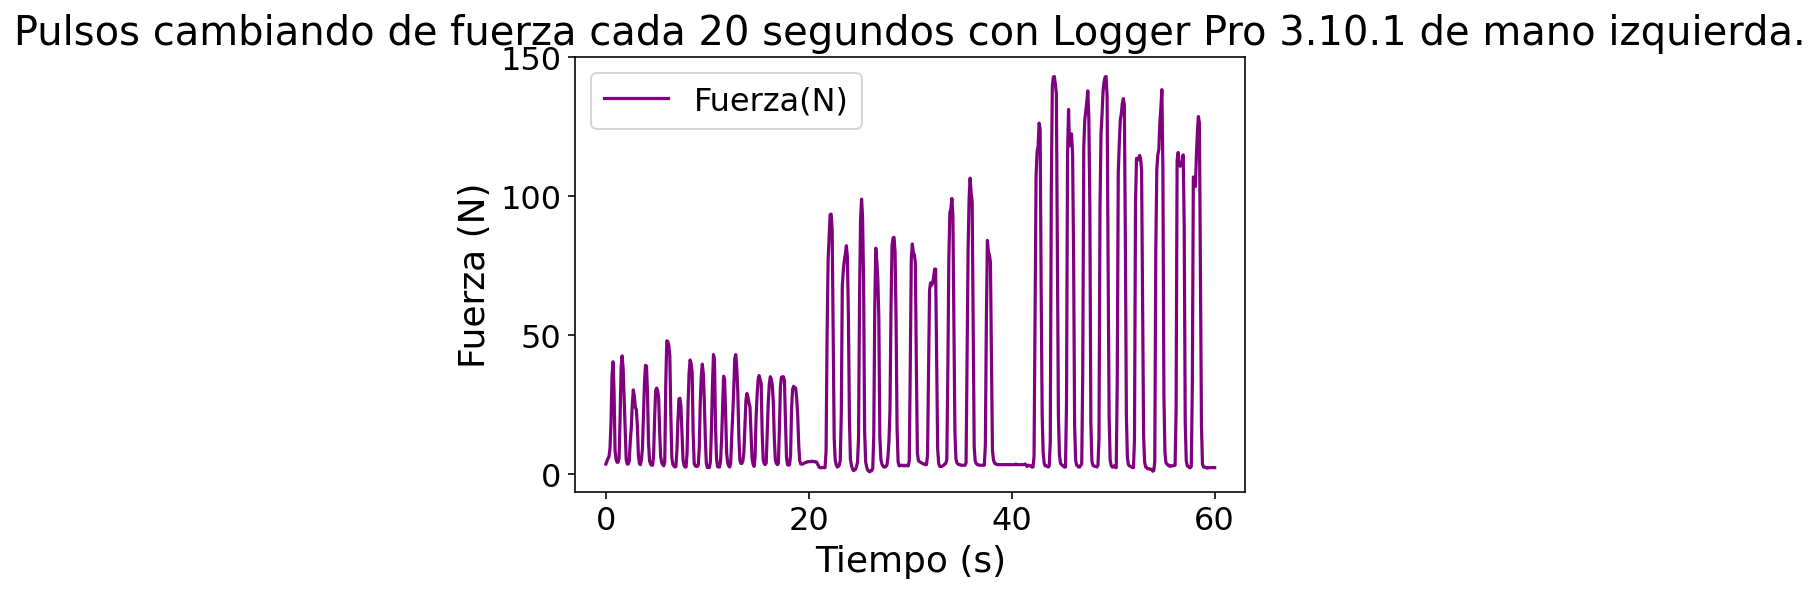

In [408]:
EMG(archivo='../Registros/leftHand/S1_EMG_leftHand_gripIntermittent.wav')
EMG3(Vernier="../Registros/leftHand/S1_force_leftHand_gripIntermittentEd.csv")

En las gráficas obtenidas de Hand Dynamometer Vernier/ Interfaz LabQuest Mini Vernier & Muscle SpikerBox en la mano izquierda, se observan pulsos cambiando de fuerza cada 20 segundos a fuerzas de 50 N, 100 N y 200 N. Ambas señales son bastante parecidas, sin embargo , la señal registrada por la interfaz solamente almacena los datos rectificados/ absolutos (los datos positivos). Desde la perspectiva visual podemos ver que la señal obtenida del Muscle SpikerBox tiene mayor ruido experimental y debido a esto la amplitud a diferentes fuerzas se ve afectada, mientras que la señal obtenida de la interfaz muestra una amplitud más definida, podemos suponer que la señal ya fue filtrada. Debemos destacar que la amplitud de los pulsos de la mano izquierda es menor a la de los pulsos registrados de la misma actividad pero en la mano derecha, podemos suponer que la mano dominante del sujeto no es la izquierda.

<a id='100manoderecha'></a>
### Fatiga a 50 N por 100 segundos de mano derecha.

In [415]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    #print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    #print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    #print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,6))                                           #Tamaño de la gráfica.
    #plt.xlim(0, 60)
    #plt.ylim(0, 10000)
    plt.title('Fatiga a 50 N por 100 segundos con Spike Recorder de mano derecha.') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

In [416]:
def EMG4(Vernier):
    plt.figure(figsize=(8,6))                                                             #Tamaño de la gráfica
    Vernier = pd.read_csv("../Registros/rightHand/S1_force_rightHand_gripFatigueEd.csv")    #Introducimos nuestro archivo .csv
    Vernier.plot("Tiempo(s)", "Fuerza(N)", color='purple')              #Graficamos nuestros datos
    #Graficamos EMG.
    plt.title('Fatiga a 50 N por 100 segundos con Logger Pro 3.10.1 de mano derecha.')  #Título.
    plt.xlabel(r'Tiempo (s)')                                                             #Título del eje horizontal.
    plt.ylabel(r'Fuerza (N)')                                                             #Título del eje vertical.

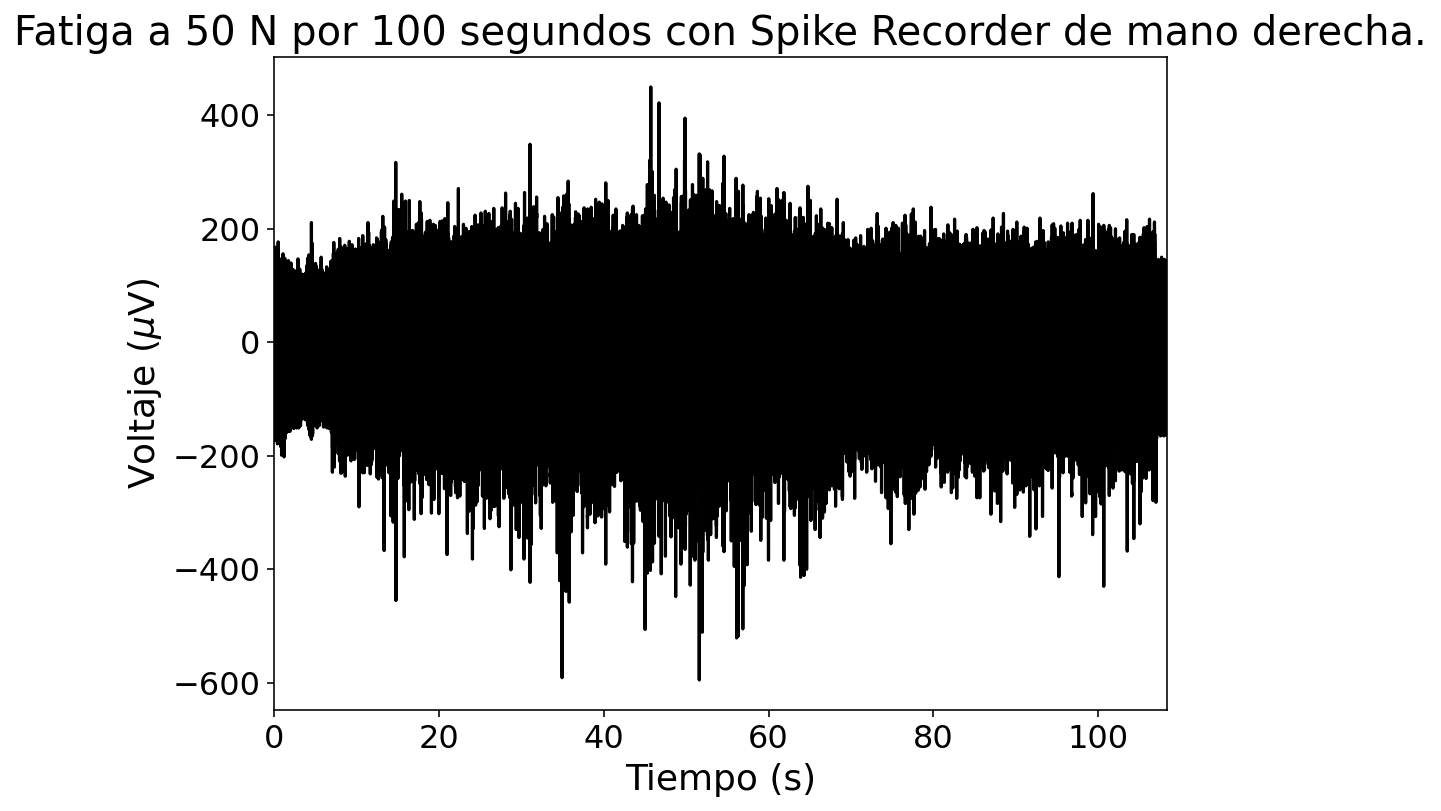

<Figure size 576x432 with 0 Axes>

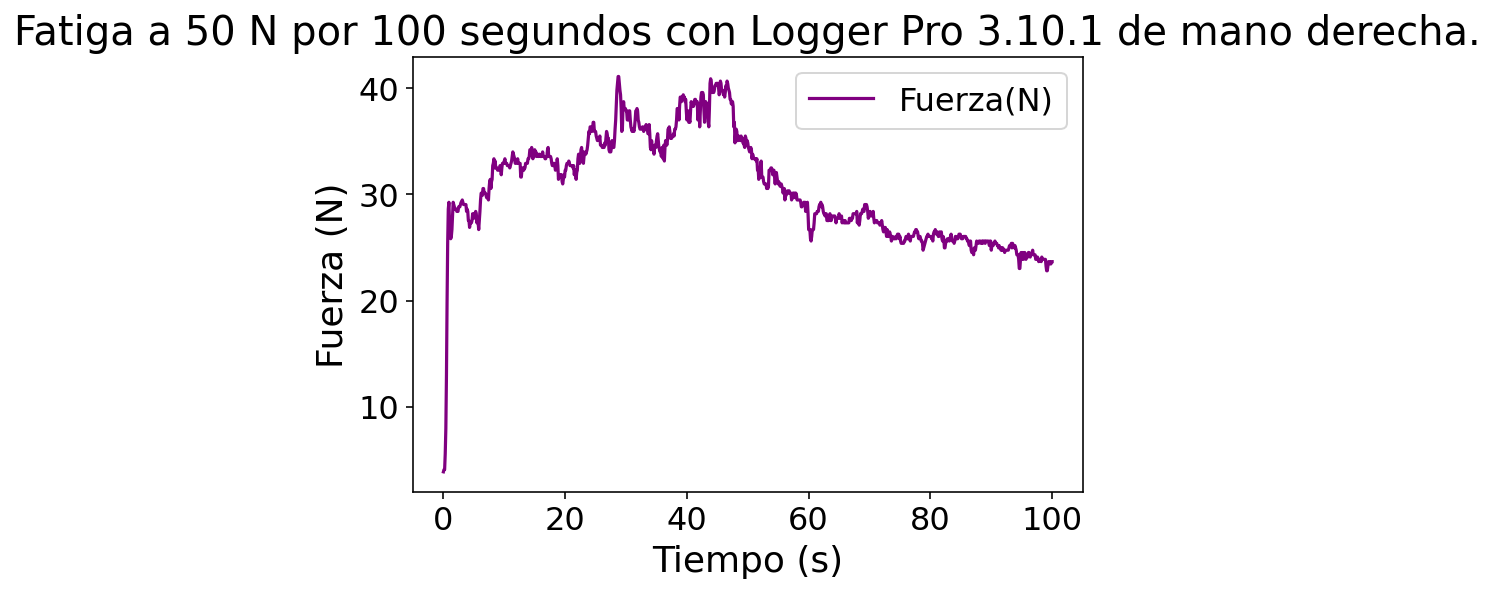

In [417]:
EMG(archivo='../Registros/rightHand/S1_EMG_rightHand_gripFatigue.wav')
EMG4(Vernier="../Registros/rightHand/S1_force_rightHand_gripFatigueEd.csv")

En las gráficas obtenidas de Hand Dynamometer Vernier/ Interfaz LabQuest Mini Vernier & Muscle SpikerBox en la mano derecha, se observa la fatiga a 50 N por 100 segundos. Ambas señales son bastante parecidas, sin embargo , la señal registrada por la interfaz solamente almacena los datos rectificados/ absolutos (los datos positivos). Desde la perspectiva visual podemos ver que la señal obtenida del Muscle SpikerBox tiene mayor ruido experimental, ya que existen reclutamiento de neuronas motoras y la actividad de otros músculos que afectan el registro desde el electrodo superficial, mientras que la señal obtenida de la interfaz muestra una amplitud más definida, podemos suponer que la señal ya fue filtrada. Debemos destacar que la amplitud de la fatiga de la mano derecha es menor a la fatiga registrada de la misma actividad pero en la mano izquierda, ya que decrece de manera progresiva a una fuerza de 20N aproximadamente , podemos suponer que la mano dominante del sujeto es la derecha.

<a id='100manoizquierda'></a>
### Fatiga a 50 N por 100 segundos de mano izquierda.

In [412]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    #print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    #print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    #print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,6))                                           #Tamaño de la gráfica.
    #plt.xlim(0, 60)
    #plt.ylim(0, 10000)
    plt.title('Fatiga a 50 N por 100 segundos con Spike Recorder de mano izquierda.') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

In [413]:
def EMG5(Vernier):
    plt.figure(figsize=(8,6))                                                             #Tamaño de la gráfica
    Vernier = pd.read_csv("../Registros/leftHand/S1_force_leftHand_gripFatigueEd.csv")    #Introducimos nuestro archivo .csv
    Vernier.plot("Tiempo(s)", "Fuerza(N)", color='purple')              #Graficamos nuestros datos
    #Graficamos EMG.
    plt.title('Fatiga a 50 N por 100 segundos con Logger Pro 3.10.1 de mano izquierda.')  #Título.
    plt.xlabel(r'Tiempo (s)')                                                             #Título del eje horizontal.
    plt.ylabel(r'Fuerza (N)')                                                             #Título del eje vertical.

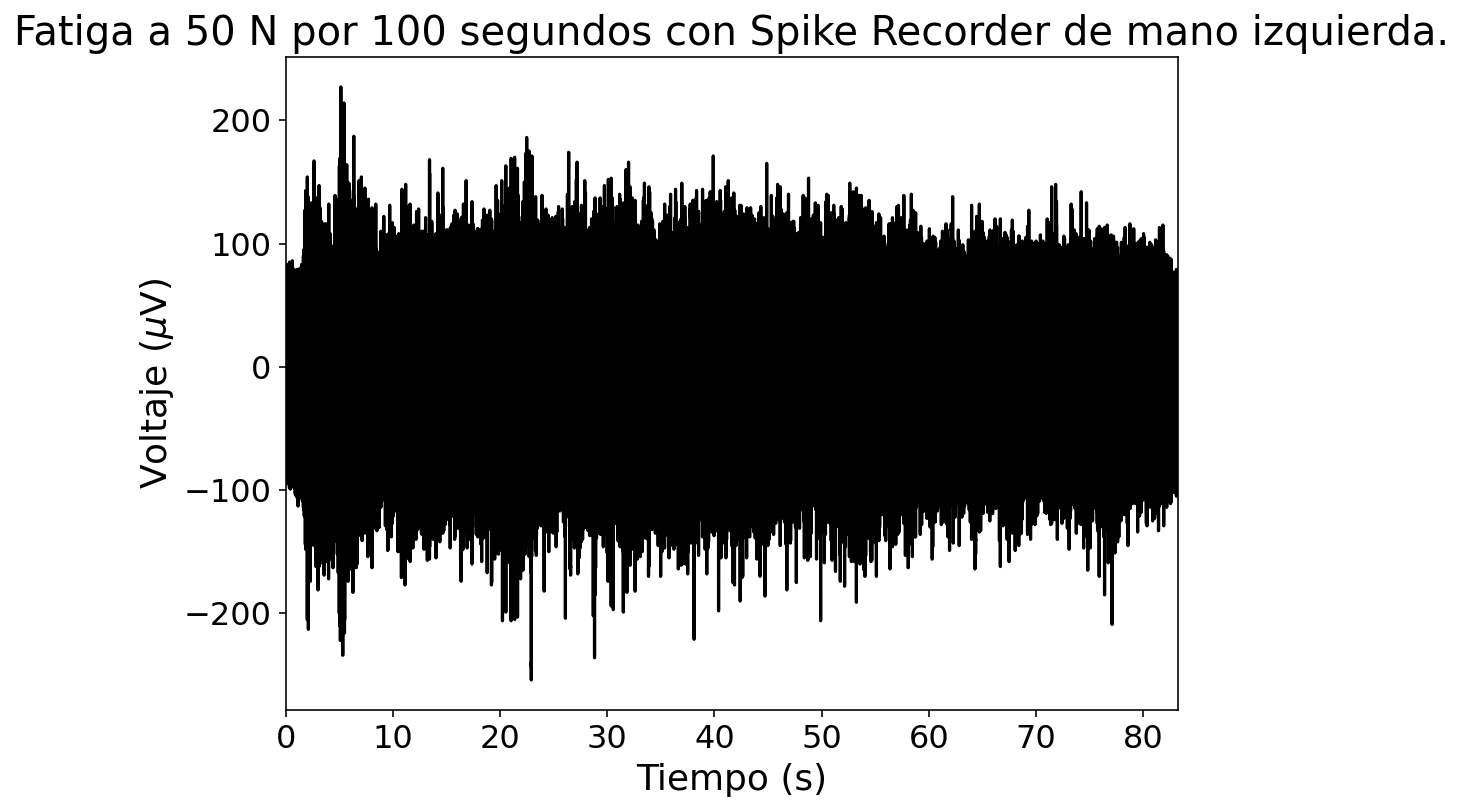

<Figure size 576x432 with 0 Axes>

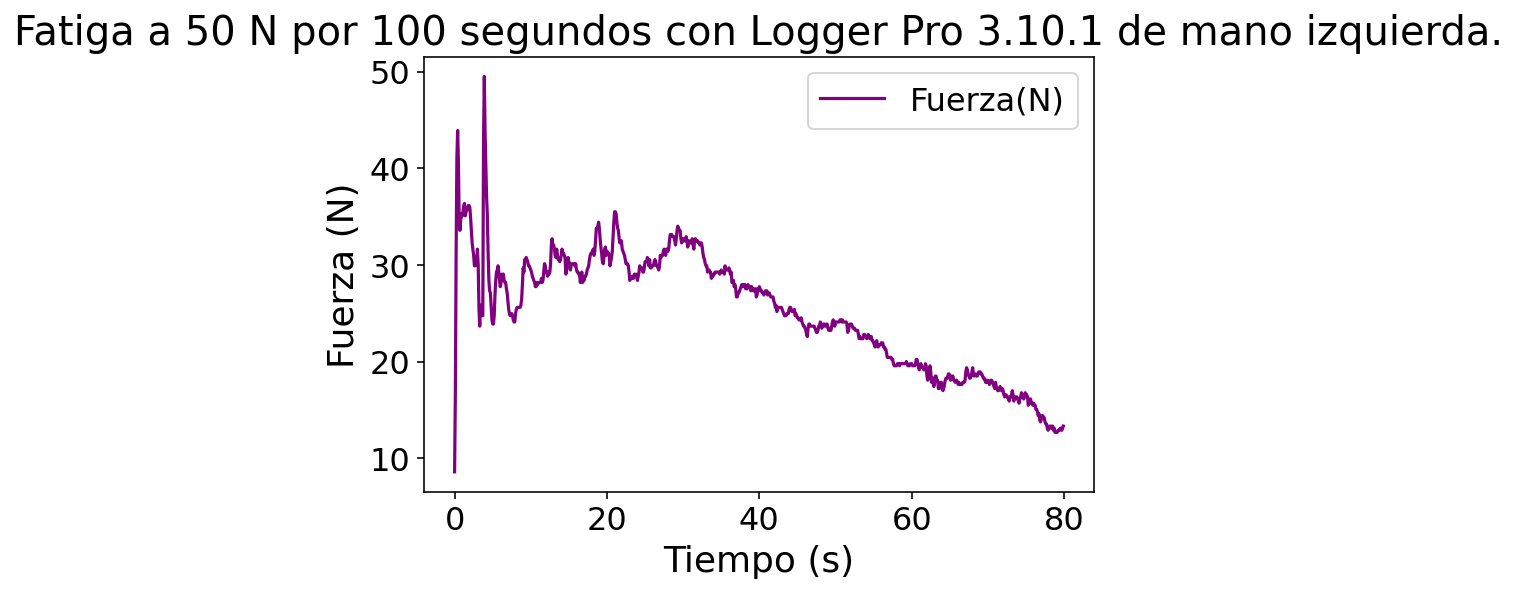

In [414]:
EMG(archivo='../Registros/leftHand/S1_EMG_leftHand_gripFatigue.wav')
EMG5(Vernier="../Registros/leftHand/S1_force_leftHand_gripFatigueEd.csv")

En las gráficas obtenidas de Hand Dynamometer Vernier/ Interfaz LabQuest Mini Vernier & Muscle SpikerBox en la mano izquierda, se observa la fatiga a 50 N por 100 segundos. Ambas señales son bastante parecidas, sin embargo , la señal registrada por la interfaz solamente almacena los datos rectificados/ absolutos (los datos positivos). Desde la perspectiva visual podemos ver que la señal obtenida del Muscle SpikerBox tiene mayor ruido experimental, ya que existen reclutamiento de neuronas motoras y la actividad de otros músculos que afectan el registro desde el electrodo superficial, mientras que la señal obtenida de la interfaz muestra una amplitud más definida, podemos suponer que la señal ya fue filtrada. Debemos destacar que la amplitud de la fatiga de la mano izquierda es mayor a la fatiga registrada de la misma actividad pero en la mano derecha, ya que decrece de manera más rápida a una fuerza de 15 N aproximadamente, podemos suponer que la mano dominante del sujeto no es la izquierda ya que su fatiga es más eminente.

### Referencias

Registros recuperados del repositorio elaborado por la Dra.Erin C. McKiernan y colaboradores, consultado en:
https://github.com/emckiernan/electrophys

Este trabajo fue apoyado por UNAM-DGAPA-PAPIME PE213817 y PE213219.